<a href="https://colab.research.google.com/github/NaraGuimma/BrazilianEducation/blob/main/BrazilianEducation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***

# BRAZILIAN EDUCATION - ENEM

***

## INSTALLING AND IMPORTING LIBRARIES

In [2]:
pip install heatmapz

In [4]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5977 sha256=dce59ea9aee67473666360971a43e137a89fe8160fdc5c39f0bec5d2f1cd8a31
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [5]:
import pandas               as pd
import seaborn              as sns

import matplotlib
import matplotlib.pyplot    as plt
import numpy                as np

from datetime               import datetime
from heatmap                import heatmap, corrplot
from sklearn.preprocessing  import OrdinalEncoder, StandardScaler
from sklearn.cluster        import KMeans
from IPython.display        import IFrame, Image


from apyori              import apriori
import warnings
warnings.filterwarnings('ignore')

## IMPORTING THE DATASET

In [16]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

df_raw = pd.read_csv(fonte)
df_raw.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [17]:
df_raw.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
CO_MUNICIPIO_RESIDENCIA     int64
NO_MUNICIPIO_RESIDENCIA    object
CO_UF_RESIDENCIA            int64
                            ...  
Q021                       object
Q022                       object
Q023                       object
Q024                       object
Q025                       object
Length: 136, dtype: object

In [18]:
# Visualizando os estados
df_raw["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [19]:
# Criando a variável df para dados somente de SP
df = df_raw[(df_raw['SG_UF_RESIDENCIA'] == 'SP')]

In [20]:
#df.to_csv('SG_UF_RESIDENCIA_sp.csv', sep = ';')

In [21]:
# Visualizando o dataframe com dados aleatórios
df.sample(3)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
58617,190003346392,2019,3548708,São Bernardo do Campo,35,SP,20,M,1,1,1,3547809.0,Santo André,35.0,SP,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,C,C,B,5,E,A,B,D,A,A,B,B,B,A,B,A,A,C,B,B,D,B,A,B
20127,190001805536,2019,3515707,Ferraz de Vasconcelos,35,SP,18,F,1,3,1,3515707.0,Ferraz de Vasconcelos,35.0,SP,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBCEECCAACEBCBDACECDECBCEEBBCCBBBCDAEABCACAD,CADDD99999BDAECBEAABAAADDEBEAECEDBEEECCAACCECC...,BAAABBCCABCEADECCBACBBCDBBACBCCBCEDABEDABDABB,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,100.0,80.0,100.0,40.0,420.0,H,H,F,B,3,C,A,B,B,A,A,B,A,A,A,A,A,A,B,B,A,D,A,A,B
92837,190004711501,2019,3543402,Ribeirão Preto,35,SP,20,M,1,2,1,3543402.0,Ribeirão Preto,35.0,SP,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABDBADCDCAAEBCCACCBCEEDEBADCADCDBECAAEBEBECAC,BAEDA99999CBABAEEBBCCADBDEDBDBCAEDAADDDAECDCCA...,EEDADDCBABCCAEABBECCABDCBABEBBDCABCBBDEDADBCC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,100.0,120.0,120.0,580.0,D,F,B,D,1,B,A,B,B,A,A,B,B,A,A,B,A,A,A,A,A,B,A,B,B


## EXPLORING THE DATASET

In [22]:
# Tamanho do dataset
df.shape

print('O dataset possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataset possui 20264 linhas e 136 colunas


In [23]:
# Verificando as colunas existentes
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [24]:
# Verificando se somente SP está nos dataframe
df['SG_UF_RESIDENCIA'].value_counts()

SP    20264
Name: SG_UF_RESIDENCIA, dtype: int64

In [25]:
# Selecionando as colunas que serão importantes para análise (muitas colunas com valores nulos)

columns = ['NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
          'TP_ANO_CONCLUIU', 'TP_ESCOLA','IN_TREINEIRO', 
          'CO_ESCOLA', 'TP_LOCALIZACAO_ESC', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_NOME_SOCIAL',
          'TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT', 'NU_NOTA_CN', 
           'TP_ST_CONCLUSAO','NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 
           'NU_NOTA_REDACAO',
           'Q001','Q002','Q003','Q004','Q005','Q006','Q007','Q008','Q009','Q010','Q011','Q012','Q013',
           'Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023','Q024','Q025']


In [26]:
# Sobrepondo a variavel df // Somente as colunas selecionadas para análise
df = df[columns]
df.sample(3)

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,TP_LOCALIZACAO_ESC,IN_GESTANTE,IN_LACTANTE,IN_NOME_SOCIAL,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,TP_ST_CONCLUSAO,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
37681,190002517755,17,F,1,1,0,2,0,35902743.0,1.0,0,0,0,0,0,0,0,NaN,2,NaN,NaN,NaN,0,NaN,NaN,C,E,C,F,4,B,A,B,B,B,A,B,B,B,A,B,A,A,B,A,A,B,A,B,B
92199,190004685270,25,F,1,3,0,2,0,35037606.0,1.0,0,0,0,1,1,1,1,371.8,2,516.8,420.7,369.5,0,1.0,220.0,B,C,B,B,2,A,A,B,B,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A
124705,190005994560,41,F,1,3,13,1,0,NaN,NaN,0,0,0,1,1,1,1,369.0,1,467.0,455.4,382.3,0,1.0,540.0,A,A,A,B,4,E,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,B,B,B


In [27]:
# Tamanho do dataset
df.shape

print('O dataset possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataset possui 20264 linhas e 50 colunas


In [28]:
# Verificando valores nulos
df.isna().sum()

NU_INSCRICAO              0
NU_IDADE                  0
TP_SEXO                   0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
IN_TREINEIRO              0
CO_ESCOLA             14735
TP_LOCALIZACAO_ESC    14735
IN_GESTANTE               0
IN_LACTANTE               0
IN_NOME_SOCIAL            0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
NU_NOTA_CN             5659
TP_ST_CONCLUSAO           0
NU_NOTA_CH             4694
NU_NOTA_LC             4694
NU_NOTA_MT             5659
TP_LINGUA                 0
TP_STATUS_REDACAO      4694
NU_NOTA_REDACAO        4694
Q001                      0
Q002                      0
Q003                      0
Q004                      0
Q005                      0
Q006                      0
Q007                      0
Q008                      0
Q009                      0
Q010                      0
Q011                

In [29]:
# Contando a quantidade de NaN no dataframe
valores_nulos_escola = np.count_nonzero(~np.isnan(df['CO_ESCOLA']))
valores_nulos_escola

5529

In [30]:
# Excluindo as colunas CO_ESCOLA e TP_LOCALIZACAO_ESC
df.drop(['CO_ESCOLA', 'TP_LOCALIZACAO_ESC'], axis = 1, inplace = True)

In [31]:
# Tamanho do dataset
df.shape

print('O dataset possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataset possui 20264 linhas e 48 colunas


In [32]:
# Verificando o tipo de dado
df.dtypes

NU_INSCRICAO           int64
NU_IDADE               int64
TP_SEXO               object
TP_ESTADO_CIVIL        int64
TP_COR_RACA            int64
TP_ANO_CONCLUIU        int64
TP_ESCOLA              int64
IN_TREINEIRO           int64
IN_GESTANTE            int64
IN_LACTANTE            int64
IN_NOME_SOCIAL         int64
TP_PRESENCA_CN         int64
TP_PRESENCA_CH         int64
TP_PRESENCA_LC         int64
TP_PRESENCA_MT         int64
NU_NOTA_CN           float64
TP_ST_CONCLUSAO        int64
NU_NOTA_CH           float64
NU_NOTA_LC           float64
NU_NOTA_MT           float64
TP_LINGUA              int64
TP_STATUS_REDACAO    float64
NU_NOTA_REDACAO      float64
Q001                  object
Q002                  object
Q003                  object
Q004                  object
Q005                   int64
Q006                  object
Q007                  object
Q008                  object
Q009                  object
Q010                  object
Q011                  object
Q012          

## DATA ANALYSIS

---



### AGE

In [33]:
# Analisando o aluno mais novo e o mais velho
print('O aluno mais novo tem {} anos e o mais velho {} anos'.format(df['NU_IDADE'].min(), df['NU_IDADE'].max() ))

O aluno mais novo tem 13 anos e o mais velho 73 anos


In [34]:
#  Visualizando os alunos por idade (verificado que há idades incorretas)
df['NU_IDADE'].value_counts().sort_index()

13       1
14      10
15     297
16    1419
17    5594
18    3592
19    2072
20    1355
21     912
22     729
23     600
24     476
25     354
26     275
27     262
28     243
29     184
30     159
31     153
32     155
33     129
34     117
35     105
36     118
37      90
38      97
39      79
40      64
41      71
42      49
43      54
44      47
45      55
46      46
47      38
48      36
49      46
50      28
51      18
52      22
53      18
54       7
55      13
56      13
57      15
58       8
59       3
60       4
61      10
62       3
63       3
64       7
65       3
66       1
67       2
70       1
72       1
73       1
Name: NU_IDADE, dtype: int64

In [35]:
# Considerando que para fazer o ENEM precisa estar cursando o ensino médio, o que inicia entre 14 - 15 anos, 
# foi considerando alunos a partir de 13 anos (considerando alguns alunos mais "adiantados" quanto a idade)
# Alunos com idade menor a 13 anos terão a idade substituída para a mediana

# Quantidade de alunos com idade menor que 13
df['NU_IDADE'][df['NU_IDADE'] < 13].count()

0

In [36]:
# Calculando a média e mediana dos alunos - Analisar se a substituicao faz sentido

print(df['NU_IDADE'].mean())
print(df['NU_IDADE'].median())

20.834188709040664
18.0


In [40]:
# Verificando os alunos com idade menor 16
df[['NU_INSCRICAO', 'NU_IDADE']][df['NU_IDADE'] < 16]

,NU_INSCRICAO,NU_IDADE
14769,190001592981,15
14853,190001595851,15
15516,190001620735,15
19877,190001795773,15
19948,190001798481,15
...,...,...
125003,190006005796,15
125155,190006011460,15
125179,190006012574,15
125220,190006014071,15


In [41]:
df['NU_IDADE'][df['NU_IDADE'] < 16].count()

308

In [42]:
# Substituindo os valores
df.loc[df.NU_IDADE < 16, 'NU_IDADE'] = 18

In [43]:
# Consultando qt. candidatos com idade < 13
df['NU_IDADE'][df['NU_IDADE'] < 16].count()

0

In [44]:
# Verificando se está correto I
df['NU_IDADE'].value_counts().sort_index()

16    1419
17    5594
18    3900
19    2072
20    1355
21     912
22     729
23     600
24     476
25     354
26     275
27     262
28     243
29     184
30     159
31     153
32     155
33     129
34     117
35     105
36     118
37      90
38      97
39      79
40      64
41      71
42      49
43      54
44      47
45      55
46      46
47      38
48      36
49      46
50      28
51      18
52      22
53      18
54       7
55      13
56      13
57      15
58       8
59       3
60       4
61      10
62       3
63       3
64       7
65       3
66       1
67       2
70       1
72       1
73       1
Name: NU_IDADE, dtype: int64

## MAJOR ANALYSIS

### KNOWING THE CANDIDATES

In [47]:
# Visualização geral das informaçoes
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,20264.0,1.900037e+11,1365743.17,1.900012e+11,1.900024e+11,1.900037e+11,1.900047e+11,1.900061e+11
NU_IDADE,20264.0,2.088000e+01,6.75,1.600000e+01,1.700000e+01,1.800000e+01,2.100000e+01,7.300000e+01
TP_ESTADO_CIVIL,20264.0,1.070000e+00,0.41,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_COR_RACA,20264.0,1.770000e+00,0.99,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00
TP_ANO_CONCLUIU,20264.0,2.410000e+00,3.77,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.300000e+01
TP_ESCOLA,20264.0,1.440000e+00,0.63,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
IN_TREINEIRO,20264.0,1.100000e-01,0.32,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
IN_GESTANTE,20264.0,0.000000e+00,0.01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
IN_LACTANTE,20264.0,0.000000e+00,0.02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
IN_NOME_SOCIAL,20264.0,0.000000e+00,0.01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [48]:
# Selecionando as colunas de presenca e nota, agrupando pela presenca e somando a nota
df[['TP_PRESENCA_CN', 'NU_NOTA_CN']].groupby('TP_PRESENCA_CN').sum() #quem é eliminado, zera a prova

,NU_NOTA_CN
TP_PRESENCA_CN,
0,0.0
1,7267473.8
2,0.0


### ATTENDANCE RATE

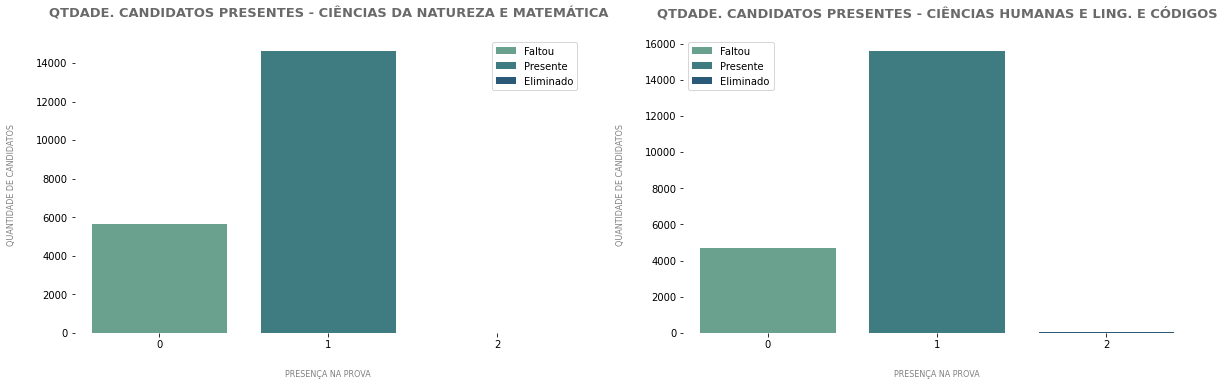

In [49]:
plt.figure(figsize=(20, 25))
#plt.subplots_adjust(hspace = 0.40)

ax2 = plt.subplot(4, 2, 2)
ax2 = sns.countplot(x = 'TP_PRESENCA_CH',data = df,
                    palette = 'crest', hue = 'TP_PRESENCA_CH',
                   dodge = False)

ax2 = plt.title('QTDADE. CANDIDATOS PRESENTES - CIÊNCIAS HUMANAS E LING. E CÓDIGOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax2 = sns.despine(bottom = True, left=True)
ax2 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 20, fontsize = 8)
ax2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
ax2 = plt.legend(labels=['Faltou', 'Presente', 'Eliminado'])
ax2 = plt.legend(loc=2, labels=['Faltou', 'Presente', 'Eliminado'])



#####

ax1 = plt.subplot(4, 2, 1)
ax1 = sns.countplot(x = 'TP_PRESENCA_CN',data = df,
                    palette = 'crest', hue = 'TP_PRESENCA_CN',
                   dodge = False)

ax1 = plt.title('QTDADE. CANDIDATOS PRESENTES - CIÊNCIAS DA NATUREZA E MATEMÁTICA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax1 = sns.despine(bottom = True, left=True)
ax1 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.legend(labels=['Faltou', 'Presente', 'Eliminado'])


###################




### AGE VS GENDER

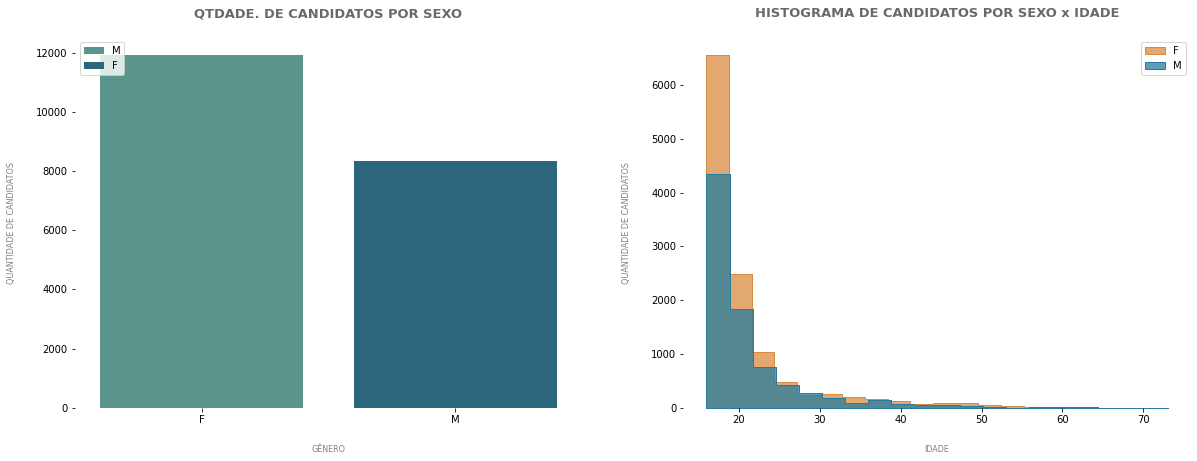

In [50]:
plt.figure(figsize=(20, 15))
s1 = plt.subplot(2, 2, 1)

s1 = sns.countplot(x = 'TP_SEXO', data = df,
                    palette = 'crest', hue = 'TP_SEXO', dodge = False
                   )
s1 = plt.title('QTDADE. DE CANDIDATOS POR SEXO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s1 = sns.despine(bottom = True, left=True)
s1 = plt.xlabel('GÊNERO', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.legend(loc=2, labels=['M', 'F'])


##############

s2 = plt.subplot(2, 2, 2)

sns.histplot(df[df['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(df[df['TP_SEXO'] == 'M']['NU_IDADE'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS POR SEXO x IDADE',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


### HIGH SCHOOL

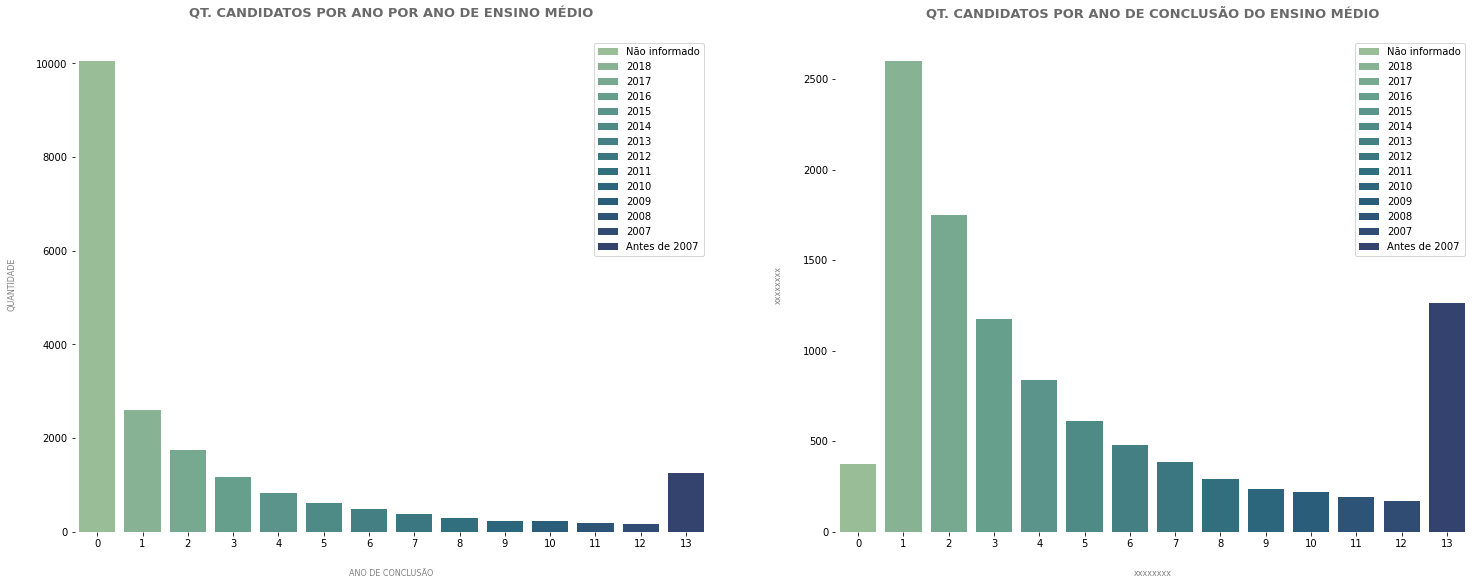

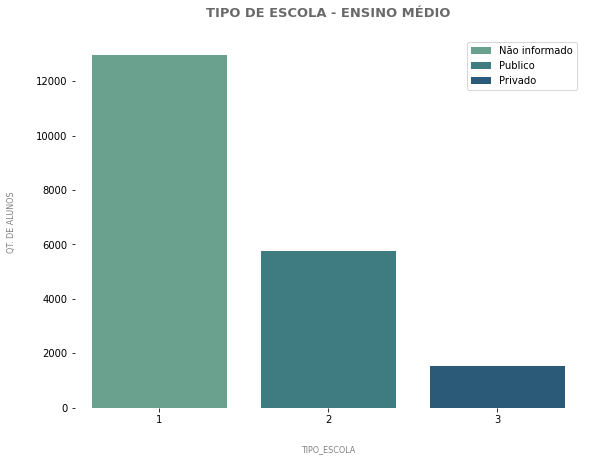

In [51]:
plt.figure(figsize=(25, 20))
s1 = plt.subplot(2, 2, 1)

s1 = sns.countplot(x = 'TP_ANO_CONCLUIU', data = df,
                    palette = 'crest', hue = 'TP_ANO_CONCLUIU', dodge = False
                   )
s1 = plt.title('QT. CANDIDATOS POR ANO POR ANO DE ENSINO MÉDIO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s1 = sns.despine(bottom = True, left=True)
s1 = plt.xlabel('ANO DE CONCLUSÃO', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.legend(loc=1, labels=['Não informado','2018','2017','2016','2015','2014','2013',
                               '2012','2011','2010','2009','2008','2007','Antes de 2007'])

##################################################

concluido = df[df['TP_ST_CONCLUSAO'] == 1]
concluido


## Somente candidatos que concluíram o ensino médio

s2 = plt.subplot(2, 2, 2)

s2 = sns.countplot(x = 'TP_ANO_CONCLUIU', data = concluido,
                    palette = 'crest', hue = 'TP_ANO_CONCLUIU', dodge = False)


s2 = plt.title('QT. CANDIDATOS POR ANO DE CONCLUSÃO DO ENSINO MÉDIO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('xxxxxxxx', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('xxxxxxxx', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=1, labels=['Não informado','2018','2017','2016','2015','2014','2013',
                               '2012','2011','2010','2009','2008','2007','Antes de 2007'])


##################################################

plt.figure(figsize=(20, 15))
s3 = plt.subplot(2, 2, 3)

s3 = sns.countplot(x = 'TP_ESCOLA', data = df,
                    palette = 'crest', hue = 'TP_ESCOLA', dodge = False
                   )
s3 = plt.title('TIPO DE ESCOLA - ENSINO MÉDIO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('TIPO_ESCOLA', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('QT. DE ALUNOS', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.legend(loc=1, labels=['Não informado', 'Publico', 'Privado'])


##################################################





### MARITAL STATUS

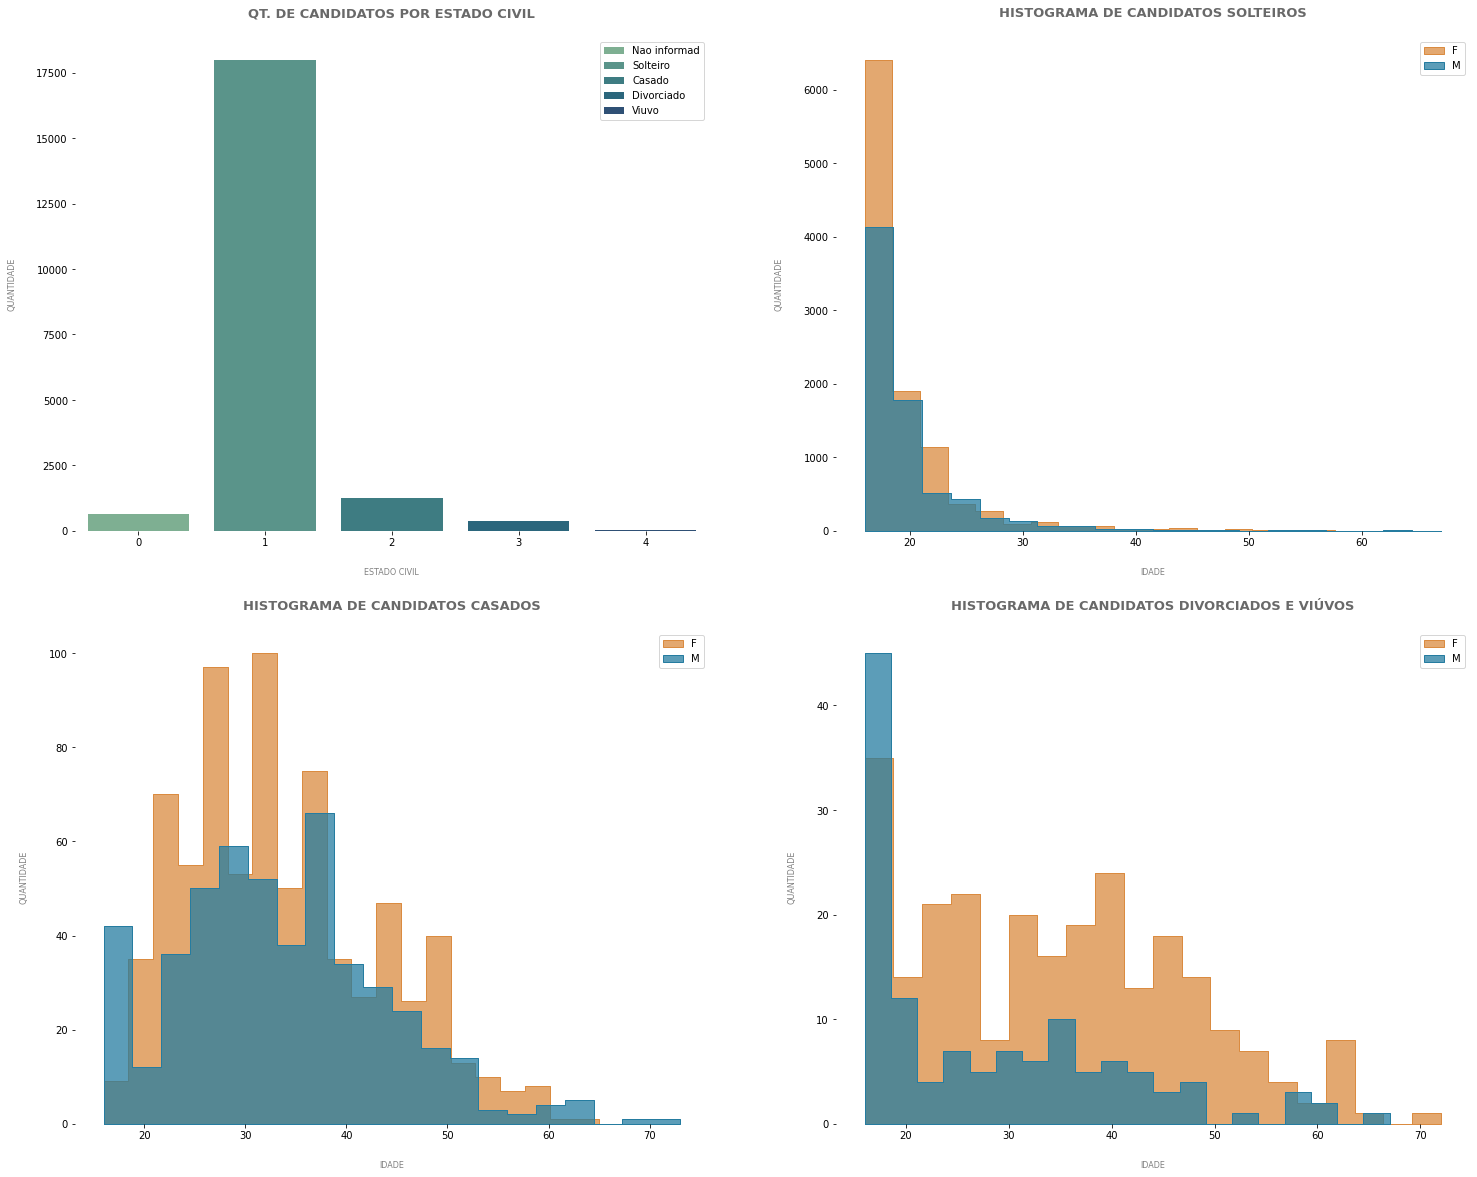

In [52]:
plt.figure(figsize=(25, 20))

s2 = plt.subplot(2, 2, 1)
s3 = sns.countplot(x = 'TP_ESTADO_CIVIL', data = df,
                    palette = 'crest', hue = 'TP_ESTADO_CIVIL', dodge = False)


s3 = plt.title('QT. DE CANDIDATOS POR ESTADO CIVIL',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('ESTADO CIVIL', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.legend(loc=1, labels=['Nao informad', 'Solteiro', 'Casado', 'Divorciado', 'Viuvo'])


##########

estado_civil = df[df['TP_ESTADO_CIVIL'] == 1]

s2 = plt.subplot(2,2, 2)

sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS SOLTEIROS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


##########

estado_civil = df[df['TP_ESTADO_CIVIL'] == 2]

s2 = plt.subplot(2, 2, 3)

sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS CASADOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


##########

estado_civil = df[(df['TP_ESTADO_CIVIL'] == 3) | (df['TP_ESTADO_CIVIL'] == 4)]

s2 = plt.subplot(2, 2, 4)

sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DIVORCIADOS E VIÚVOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()

###  ETHINICITY

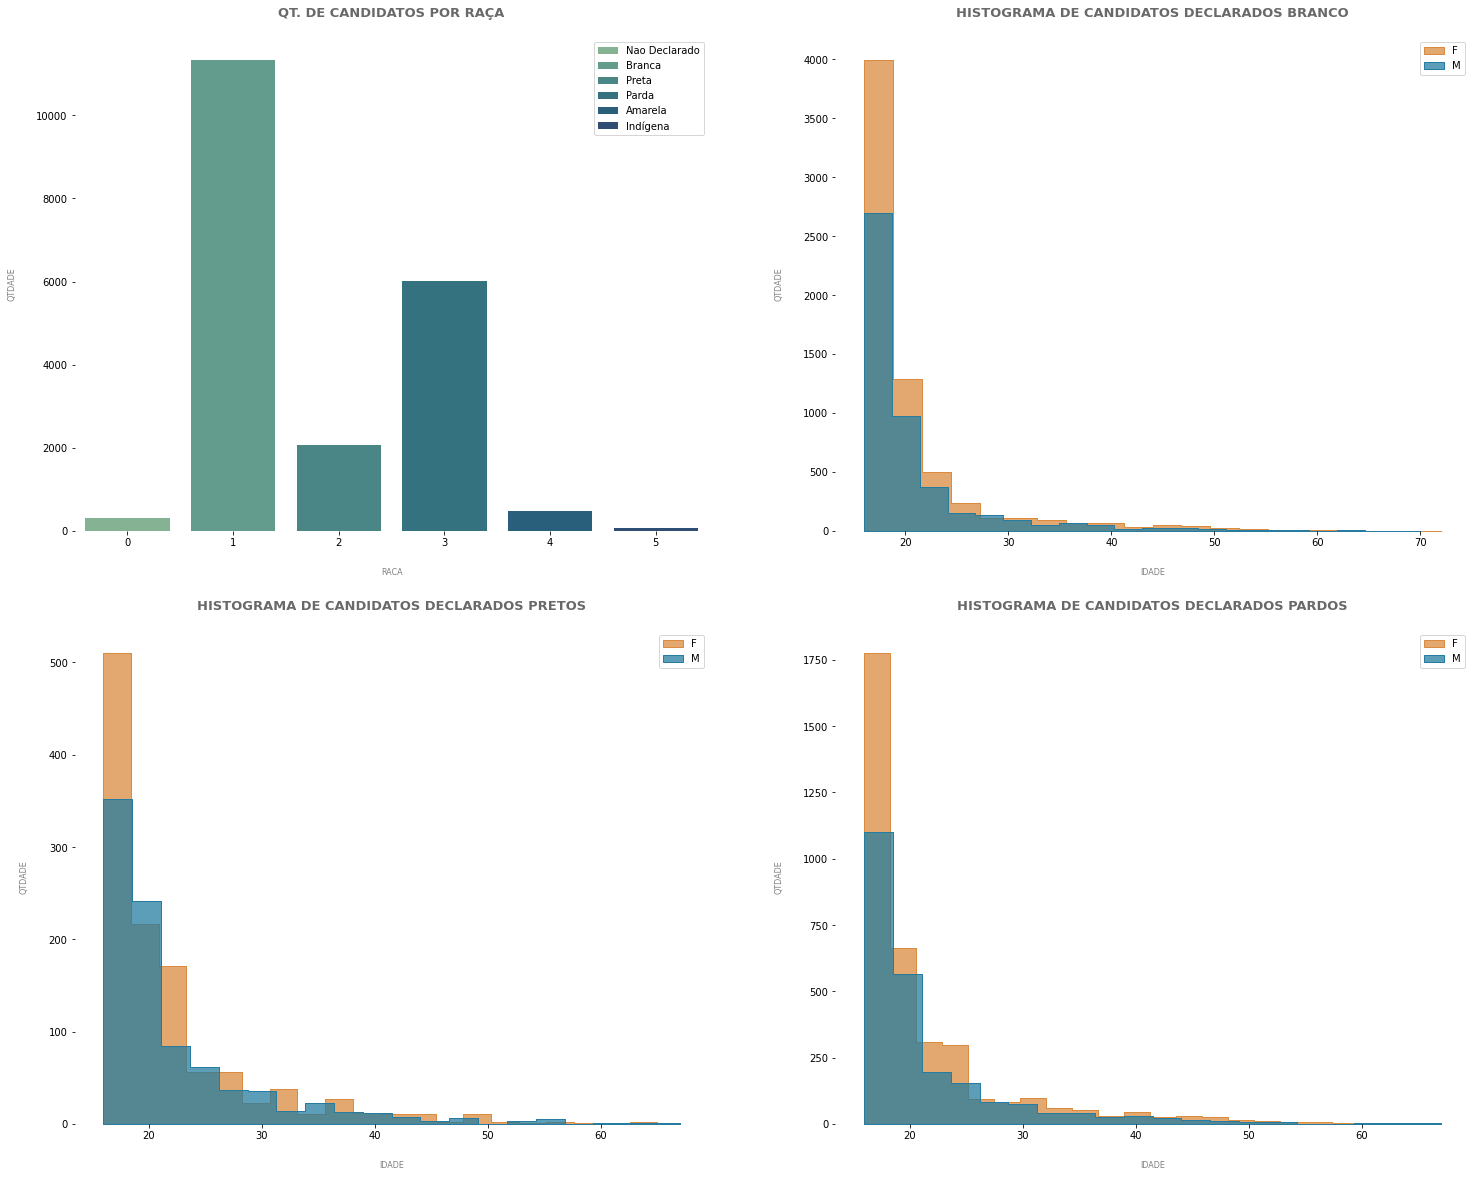

In [53]:
plt.figure(figsize=(25, 20))

s2 = plt.subplot(2, 2, 1)
s3 = sns.countplot(x = 'TP_COR_RACA', data = df,
                    palette = 'crest', hue = 'TP_COR_RACA', dodge = False)


s3 = plt.title('QT. DE CANDIDATOS POR RAÇA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('RACA', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.legend(loc=1, labels=['Nao Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])

##########

raca = df[df['TP_COR_RACA'] == 1]

s2 = plt.subplot(2, 2, 2)

sns.histplot(raca[raca['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(raca[raca['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DECLARADOS BRANCO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


##############

raca = df[df['TP_COR_RACA'] == 2]

s2 = plt.subplot(2, 2, 3)

sns.histplot(raca[raca['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(raca[raca['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DECLARADOS PRETOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()

##############

raca = df[df['TP_COR_RACA'] == 3]

s2 = plt.subplot(2, 2, 4)

sns.histplot(raca[raca['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(raca[raca['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DECLARADOS PARDOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()

### GRADES

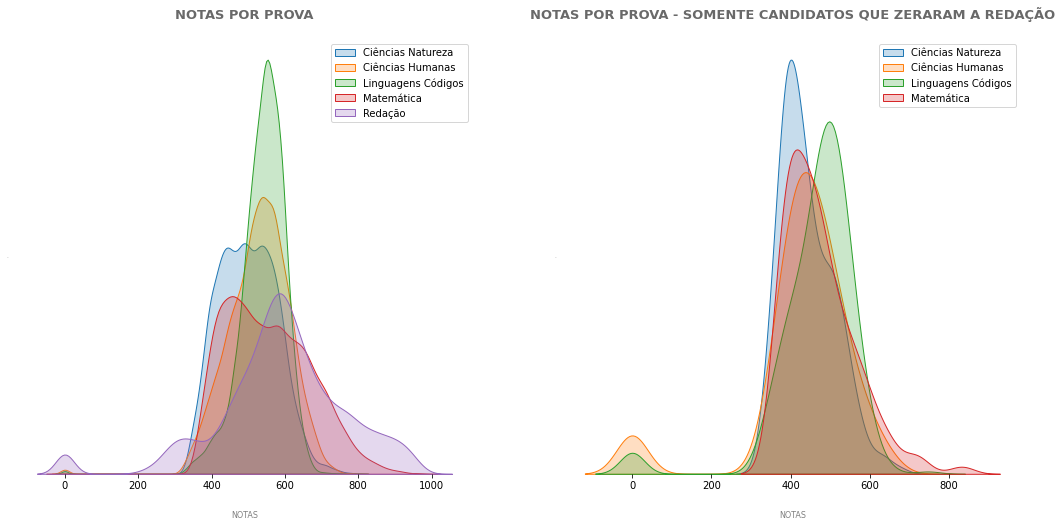

In [54]:
plt.figure(figsize=(18,8))

ax = plt.subplot(1, 2, 1)

sns.kdeplot(df['NU_NOTA_CN'], label = 'Ciências Natureza', shade = True)
sns.kdeplot(df['NU_NOTA_CH'], label = 'Ciências Humanas', shade = True)
sns.kdeplot(df['NU_NOTA_LC'], label = 'Linguagens Códigos', shade = True)
sns.kdeplot(df['NU_NOTA_MT'], label = 'Matemática', shade = True)
sns.kdeplot(df['NU_NOTA_REDACAO'], label = 'Redação', shade = True)


plt.title('NOTAS POR PROVA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)

plt.xlabel('NOTAS', color = 'grey', labelpad = 20, fontsize = 8)


ax.tick_params(axis ='y', labelsize=0, length = 0)
ax.set_yticklabels([])
plt.ylabel([], fontsize =0)

ax = plt.legend()


##################################################


ax2 = plt.subplot(1, 2, 2)

sns.kdeplot(df[df['NU_NOTA_REDACAO'] == 0]['NU_NOTA_CN'], label = 'Ciências Natureza', shade = True)
sns.kdeplot(df[df['NU_NOTA_REDACAO'] == 0]['NU_NOTA_CH'], label = 'Ciências Humanas', shade = True)
sns.kdeplot(df[df['NU_NOTA_REDACAO'] == 0]['NU_NOTA_LC'], label = 'Linguagens Códigos', shade = True)
sns.kdeplot(df[df['NU_NOTA_REDACAO'] == 0]['NU_NOTA_MT'], label = 'Matemática', shade = True)


plt.title('NOTAS POR PROVA - SOMENTE CANDIDATOS QUE ZERARAM A REDAÇÃO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)

plt.xlabel('NOTAS', color = 'grey', labelpad = 20, fontsize = 8)


ax2.tick_params(axis ='y', labelsize=0, length = 0)
ax2.set_yticklabels([])
plt.ylabel([], fontsize =0)

ax = plt.legend()

## SOCIAL ECONOMICS ANALYSIS VS GRADES

### CORRELATION

#### VARIÁVEIS NUMÉRICAS

In [ ]:
questionario=['Q001', 'Q002', 'Q006', 'Q024','Q025', 'NU_NOTA_LC',
              'NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO',
              'NOTA_TOTAL', 'PRESENCA', 'TP_COR_RACA']

In [ ]:
df1 = df[df[questionario]['PRESENCA'] == 4]

In [ ]:
# Matriz de correlação
df1.corr().round(2)

,NU_INSCRICAO,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_GESTANTE,IN_LACTANTE,IN_NOME_SOCIAL,...,TP_ST_CONCLUSAO,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005,NOTA_TOTAL,PRESENCA
NU_INSCRICAO,1.00,0.06,0.02,-0.03,0.07,-0.12,0.15,0.00,-0.00,-0.01,...,0.04,-0.03,-0.03,0.02,-0.01,0.02,-0.08,-0.01,-0.04,NaN
NU_IDADE,0.06,1.00,0.41,0.07,0.79,-0.30,-0.25,0.00,0.01,0.00,...,-0.46,-0.05,-0.11,-0.15,0.16,0.07,-0.17,-0.15,-0.15,NaN
TP_ESTADO_CIVIL,0.02,0.41,1.00,0.03,0.30,-0.10,-0.06,0.00,0.00,-0.00,...,-0.13,-0.05,-0.07,-0.08,0.07,0.03,-0.08,-0.06,-0.08,NaN
TP_COR_RACA,-0.03,0.07,0.03,1.00,0.06,-0.06,-0.10,0.00,0.00,-0.00,...,-0.10,-0.15,-0.15,-0.16,0.10,0.03,-0.13,0.04,-0.18,NaN
TP_ANO_CONCLUIU,0.07,0.79,0.30,0.06,1.00,-0.42,-0.23,0.01,0.01,0.00,...,-0.55,0.02,-0.02,-0.08,0.14,0.02,-0.10,-0.16,-0.06,NaN
TP_ESCOLA,-0.12,-0.30,-0.10,-0.06,-0.42,1.00,-0.30,-0.00,-0.01,-0.00,...,0.33,0.02,0.02,0.07,-0.07,-0.01,0.07,0.06,0.06,NaN
IN_TREINEIRO,0.15,-0.25,-0.06,-0.10,-0.23,-0.30,1.00,-0.00,-0.01,-0.00,...,0.74,0.05,0.06,0.10,-0.10,-0.01,0.04,0.00,0.08,NaN
IN_GESTANTE,0.00,0.00,0.00,0.00,0.01,-0.00,-0.00,1.00,0.04,-0.00,...,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,NaN
IN_LACTANTE,-0.00,0.01,0.00,0.00,0.01,-0.01,-0.01,0.04,1.00,-0.00,...,-0.01,-0.00,-0.00,-0.00,0.01,0.00,-0.00,0.00,-0.00,NaN
IN_NOME_SOCIAL,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,1.00,...,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,NaN


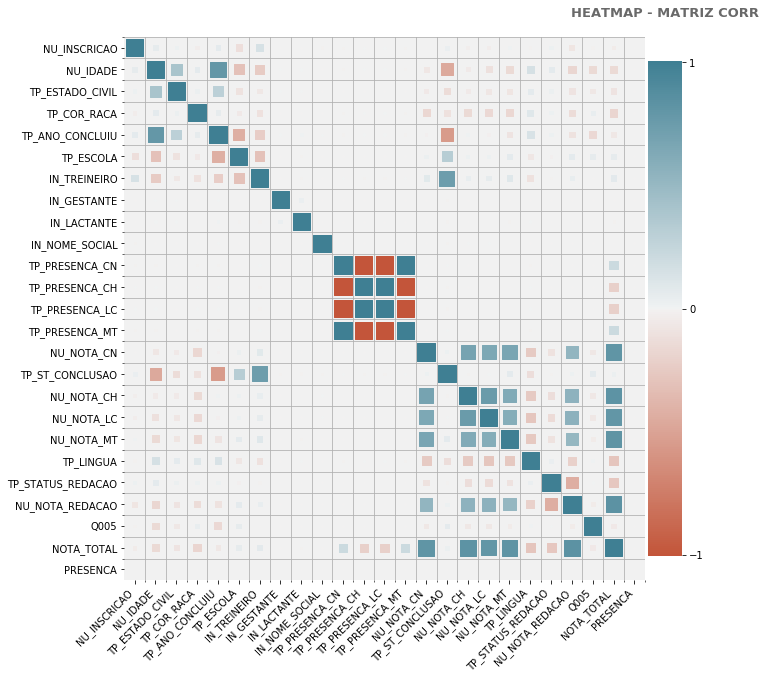

In [ ]:
# Plotando a matriz (heatmap)
ax2 = plt.figure(figsize=(10,10))

corrplot(df1.corr(), size_scale=300)

plt.title('HEATMAP - MATRIZ CORR',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)

#### VARIÁVEIS CATEGÓRICAS x NUMÉRICAS

In [ ]:
## Transformando as variaveis categoricas do questionario em numericas
df1[questionario].head(3)

,Q001,Q002,Q006,Q024,Q025,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_REDACAO,NOTA_TOTAL,PRESENCA,TP_COR_RACA
12426,H,E,C,B,B,592.9,600.2,585.8,564.6,940.0,3283.5,4,3
15223,E,E,D,A,A,634.3,731.8,641.1,576.2,880.0,3463.4,4,3
20246,B,B,C,A,B,509.6,393.2,424.8,402.2,560.0,2289.8,4,3


In [ ]:
#criando o dicionario com as "traducoes"

## Q001 e Q002
Q001 = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
    'H' : 8
}


# Q006
Q006 = {
    'A' : 0,
    'B' : 998,
    'C' : 998,
    'D' : 1497,
    'E' : 1996,
    'F' : 2495,
    'G' : 2994,
    'H' : 3992,
    'I' : 4990,
    'J' : 5988,
    'K' : 6986,
    'L' : 7984,
    'M' : 8982,
    'N' : 9980,
    'O' : 11976,
    'P' : 14970,
    'Q' : 19960
}


# Q024
Q024 = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4
}

# Q025
Q025 = {
    'A' : 1,
    'B' : 2
}

# Criando coluna com a instrucao do pai
df1['instrucao_pai'] = df1['Q001'].map(Q001)

# Criando coluna com a instrucao da mae
df1['instrucao_mae'] = df1['Q002'].map(Q001)

# Criando a coluna renda
df1['renda'] = df1['Q006'].map(Q006)

# Criando a coluna computador
df1['computador'] = df1['Q024'].map(Q024)

# Criando a coluna internet
df1['internet'] = df1['Q025'].map(Q025)

df1.head()

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_GESTANTE,IN_LACTANTE,...,Q023,Q024,Q025,NOTA_TOTAL,PRESENCA,instrucao_pai,instrucao_mae,renda,computador,internet
12426,190001017053,22,M,1,3,4,1,0,0,0,...,A,B,B,3283.5,4,8,5,998,1,2
15223,190001019850,17,F,1,3,0,3,0,0,0,...,A,A,A,3463.4,4,5,5,1497,0,1
20246,190001024874,19,M,1,3,0,2,0,0,0,...,B,A,B,2289.8,4,2,2,998,0,2
26422,190001031050,17,F,1,3,0,2,0,0,0,...,A,B,B,2292.8,4,4,7,2994,1,2
40801,190001045429,23,F,1,1,5,1,0,0,0,...,B,B,B,3577.6,4,5,6,5988,1,2


In [ ]:
df1.columns.values

array(['NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO',
       'IN_GESTANTE', 'IN_LACTANTE', 'IN_NOME_SOCIAL', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'TP_ST_CONCLUSAO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001',
       'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'NOTA_TOTAL', 'PRESENCA', 'instrucao_pai', 'instrucao_mae',
       'renda', 'computador', 'internet'], dtype=object)

In [ ]:
num_var = df1[['TP_COR_RACA', 'TP_ESCOLA', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
                'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'NOTA_TOTAL', 'instrucao_pai',
                'instrucao_mae', 'renda', 'computador', 'internet']]

num_var

,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_REDACAO,NOTA_TOTAL,instrucao_pai,instrucao_mae,renda,computador,internet
12426,3,1,585.8,592.9,600.2,564.6,940.0,3283.5,8,5,998,1,2
15223,3,3,641.1,634.3,731.8,576.2,880.0,3463.4,5,5,1497,0,1
20246,3,2,424.8,509.6,393.2,402.2,560.0,2289.8,2,2,998,0,2
26422,3,2,426.8,487.2,419.2,399.6,560.0,2292.8,4,7,2994,1,2
40801,1,1,646.5,629.3,796.1,625.7,880.0,3577.6,5,6,5988,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5094424,3,1,394.3,527.0,479.1,417.8,580.0,2398.2,5,4,1497,1,2
5094426,2,2,455.9,499.7,432.0,367.4,560.0,2315.0,2,4,2495,1,2
5094427,3,2,468.3,483.9,487.3,398.6,380.0,2218.1,8,5,998,0,2
5094428,3,2,561.8,535.0,401.1,402.8,740.0,2640.7,4,5,998,0,1


In [ ]:
# Plotando a matriz (heatmap)
corr = num_var.corr().round(2)

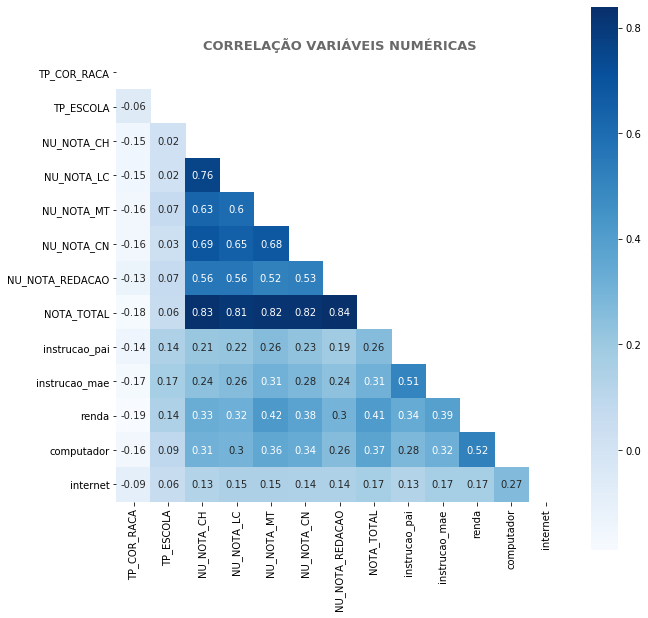

In [ ]:
plt.figure(figsize=(10, 10))


mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot = True, square = True, mask = mask, cmap = 'Blues')

plt.title('CORRELAÇÃO VARIÁVEIS NUMÉRICAS',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)



#### CORRELAÇÃO - CARACTERÍSTICAS CANDIDATOS

In [ ]:
num_cat = df1[['TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_ESCOLA', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NOTA_TOTAL', 'instrucao_pai', 'instrucao_mae',
       'renda', 'computador', 'internet']]

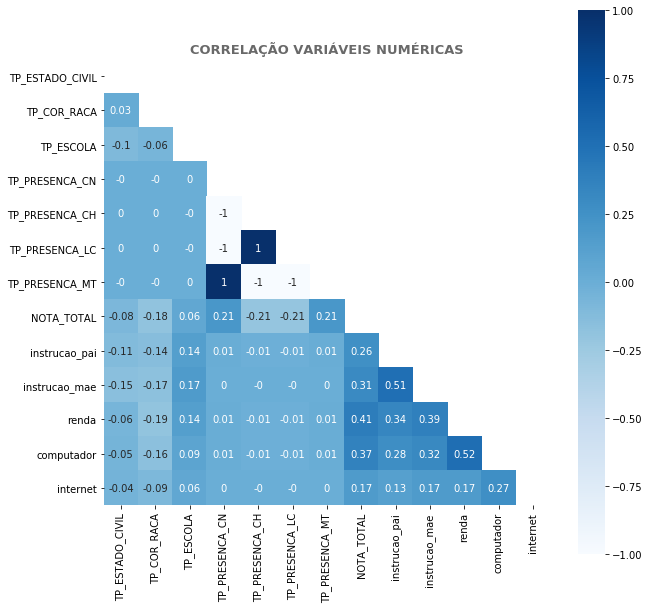

In [ ]:
cor_num_cat = num_cat.corr().round(2)

# Plotando gráfico
plt.figure(figsize=(10, 10))

mask = np.triu(np.ones_like(cor_num_cat, dtype=bool))
sns.heatmap(cor_num_cat, annot = True, square = True, mask = mask, cmap = 'Blues')

plt.title('CORRELAÇÃO VARIÁVEIS NUMÉRICAS',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)



### ESTATÍSTICA DESCRITIVA

In [ ]:
df1.columns.values

array(['NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO',
       'IN_GESTANTE', 'IN_LACTANTE', 'IN_NOME_SOCIAL', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'TP_ST_CONCLUSAO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001',
       'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'NOTA_TOTAL', 'PRESENCA', 'instrucao_pai', 'instrucao_mae',
       'renda', 'computador', 'internet'], dtype=object)

In [ ]:
# relembrando: df1 == alunos com presenca == 4

df1[['NU_IDADE', 'TP_ANO_CONCLUIU','NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
       'NOTA_TOTAL', 'instrucao_pai', 'instrucao_mae',
       'renda', 'computador', 'internet']].describe()

,NU_IDADE,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_TOTAL,instrucao_pai,instrucao_mae,renda,computador,internet
count,581825.000000,581825.000000,581184.000000,581184.000000,581184.000000,581184.000000,581184.000000,581825.000000,581825.000000,581825.000000,581825.000000,581825.000000,581825.000000
mean,19.981673,1.906769,497.063096,531.098777,542.204885,551.611452,596.019539,2715.003315,4.650292,4.730355,3502.127071,1.015780,1.914485
std,6.207859,3.392190,77.760067,78.085042,57.076068,114.050877,168.563474,419.613107,1.742639,1.532807,3898.019912,0.866585,0.279647
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,17.000000,0.000000,436.000000,479.600000,510.400000,456.600000,520.000000,2426.500000,3.000000,4.000000,998.000000,0.000000,2.000000
50%,18.000000,0.000000,495.600000,537.000000,548.000000,539.700000,600.000000,2693.900000,5.000000,5.000000,1996.000000,1.000000,2.000000
75%,20.000000,2.000000,554.500000,585.100000,581.000000,635.100000,700.000000,2995.500000,6.000000,6.000000,3992.000000,1.000000,2.000000
max,91.000000,13.000000,860.900000,822.700000,801.700000,985.000000,1000.000000,4179.500000,8.000000,8.000000,19960.000000,4.000000,2.000000


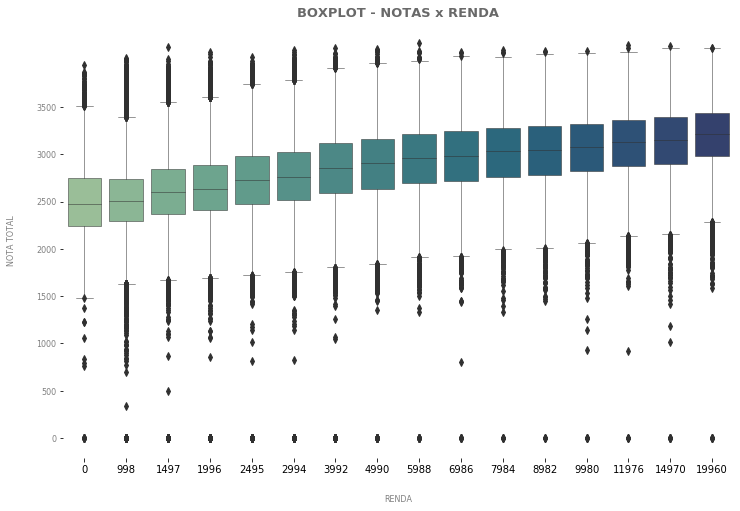

In [ ]:
s2 = plt.figure(figsize=(12,8))
s2 = sns.boxplot(x='renda', y ='NOTA_TOTAL', data = df1, palette = 'crest',
                linewidth = 0.5)


s2 = plt.title('BOXPLOT - NOTAS x RENDA',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)

# Alterando a escala do eixo y (posicao inicial, posicao final, intervalo)
s2 = y_ticks = np.arange(0, 4000, 500)
s2 = plt.yticks(y_ticks, color = 'grey', fontsize = 8)

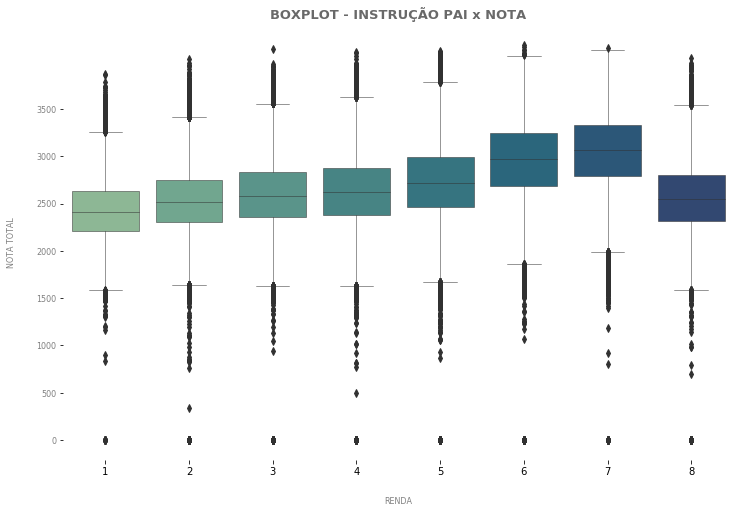

In [ ]:
s2 = plt.figure(figsize=(12,8))
s2 = sns.boxplot(x='instrucao_pai', y ='NOTA_TOTAL', data = df1, palette = 'crest',
                linewidth = 0.5)


s2 = plt.title('BOXPLOT - INSTRUÇÃO PAI x NOTA',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)

# Alterando a escala do eixo y (posicao inicial, posicao final, intervalo)
s2 = y_ticks = np.arange(0, 4000, 500)
s2 = plt.yticks(y_ticks, color = 'grey', fontsize = 8)


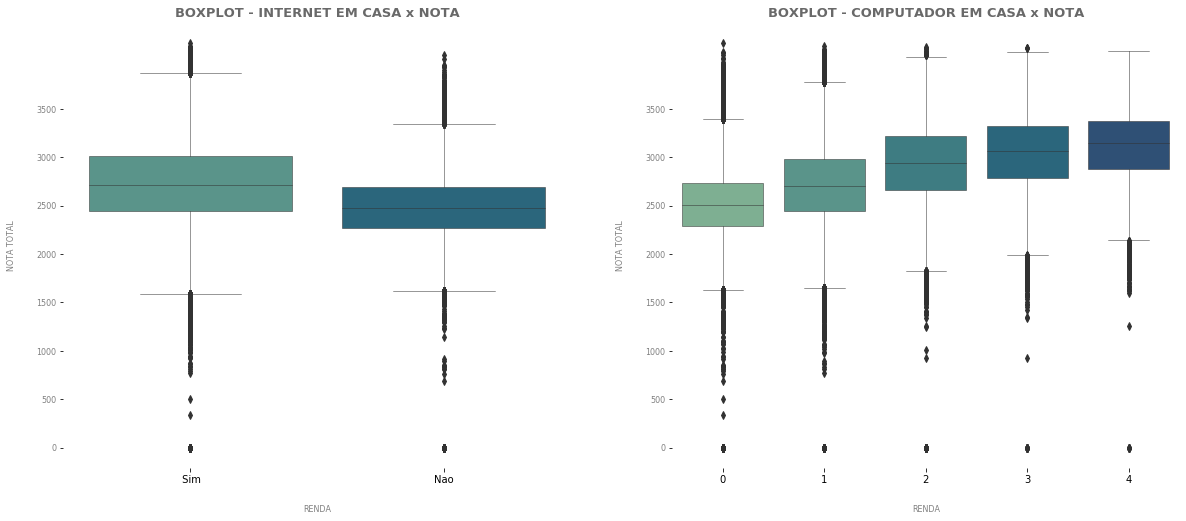

In [ ]:
internet = df1[['internet', 'NOTA_TOTAL']]
internet.replace(1, 'Nao', inplace = True)
internet.replace(2, ' Sim', inplace = True)

# Plot gráfico

s2 = plt.figure(figsize=(20,18))

plt.subplot(2, 2, 1)
s2 = sns.boxplot(x='internet', y ='NOTA_TOTAL', data = internet, palette = 'crest',
                linewidth = 0.5)


s2 = plt.title('BOXPLOT - INTERNET EM CASA x NOTA',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)

# Alterando a escala do eixo y (posicao inicial, posicao final, intervalo)
s2 = y_ticks = np.arange(0, 4000, 500)
s2 = plt.yticks(y_ticks, color = 'grey', fontsize = 8)


####

## plot

plt.subplot(2, 2, 2)
s3 = sns.boxplot(x='computador', y ='NOTA_TOTAL', data = df1, palette = 'crest',
                linewidth = 0.5)


s3 = plt.title('BOXPLOT - COMPUTADOR EM CASA x NOTA',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)

# Alterando a escala do eixo y (posicao inicial, posicao final, intervalo)
s2 = y_ticks = np.arange(0, 4000, 500)
s2 = plt.yticks(y_ticks, color = 'grey', fontsize = 8)


## SELECTION OF VARIABLES

Com base na análise de correlação e na exploração dos dados, serão selecionadas as variáveis que possivelmente vão impactar mais o modelo de Machine Learning

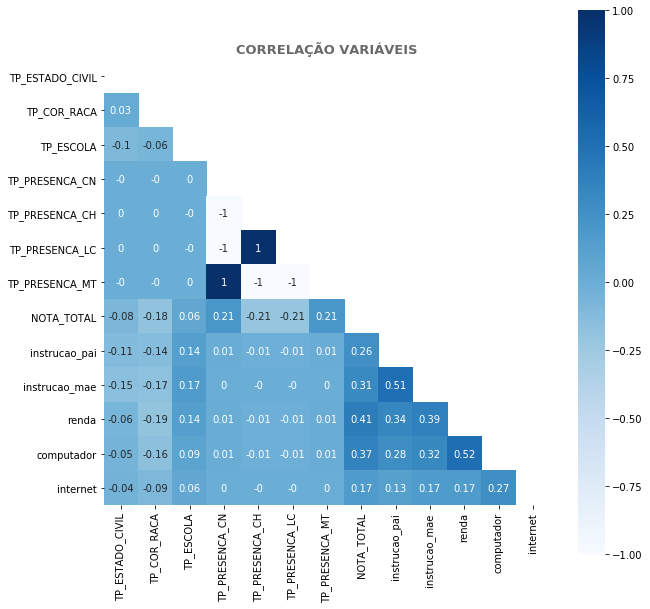

In [ ]:
df2 = num_cat.corr().round(2)

# Plotando gráfico
plt.figure(figsize=(10, 10))

mask = np.triu(np.ones_like(df2, dtype=bool))
sns.heatmap(df2, annot = True, square = True, mask = mask, cmap = 'Blues')

plt.title('CORRELAÇÃO VARIÁVEIS',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)

In [ ]:
var1 = df1[['renda', 'NOTA_TOTAL']]
var2 = df1[['instrucao_mae', 'NOTA_TOTAL']]
var3 = df1[['computador', 'NOTA_TOTAL']]
var4 = df1[['TP_COR_RACA', 'NOTA_TOTAL']]

var = df1[['renda', 'NOTA_TOTAL']]